In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
data = pd.read_csv('sim_log_KSC_52.5_100.csv')

data['time'] = data['time'] - data['time'][0]

data.head()

step  time         alt        speed        hdot        range    az_err  \
0     1     0  121.993000  7824.838905 -137.426367  8500.377145  3.113781   
1     2     2  121.718098  7825.153870 -137.475797  8500.377225  3.112216   
2     3     4  121.443097  7825.468513 -137.524347  8485.600400  3.117982   
3     4     6  121.168001  7825.782816 -137.572013  8470.821902  3.123769   
4     5     8  120.892810  7826.096764 -137.618790  8456.042815  3.129584   

         lat        long  pitch  roll  unl_roll  roll_ref       l_d      drag  \
0 -29.551283 -132.654963   38.0   0.0       0.0       0.0  0.247294  0.008687   
1 -29.452601 -132.552350   38.0   0.0       0.0       0.0  0.245561  0.008723   
2 -29.353816 -132.449940   38.0   0.0       0.0       0.0  0.246405  0.008955   
3 -29.254934 -132.347742   38.0   0.0       0.0       0.0  0.247291  0.009194   
4 -29.155954 -132.245744   38.0   0.0       0.0       0.0  0.248220  0.009441   

   drag_ref  entry_phase  Unnamed: 17  
0       0.0            1          NaN  
1       0.0            1          NaN  
2       0.0            1          NaN  
3       0.0            1          NaN  
4       0.0            1          NaN

In [3]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data['long'],
    lat=data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data['alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data['alt'].min(),
        cmax=data['alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=data['alt'],
    customdata=data['az_err']
)

center_lat = (data['lat'].min() + data['lat'].max()) / 2
center_lon = (data['long'].min() + data['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)


# Display the figure
fig.show()

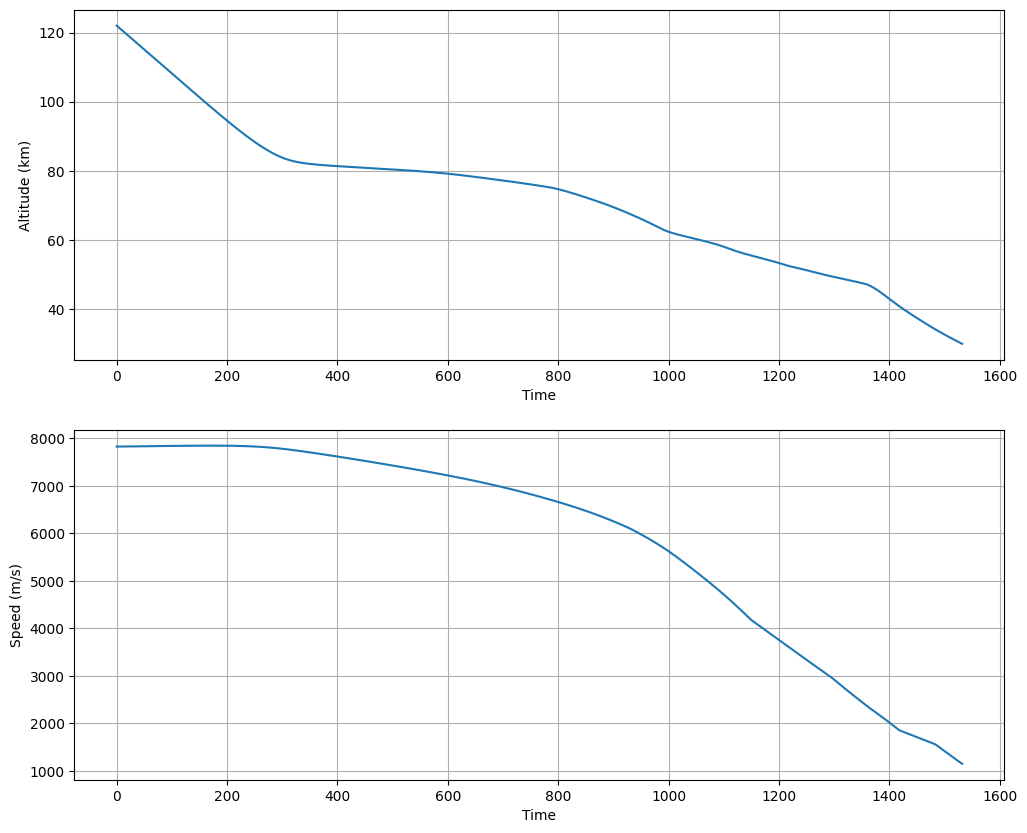

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['time'], data['alt'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_ = ax[1]
plt_.plot(data['time'], data['speed'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




-426.0180132850606


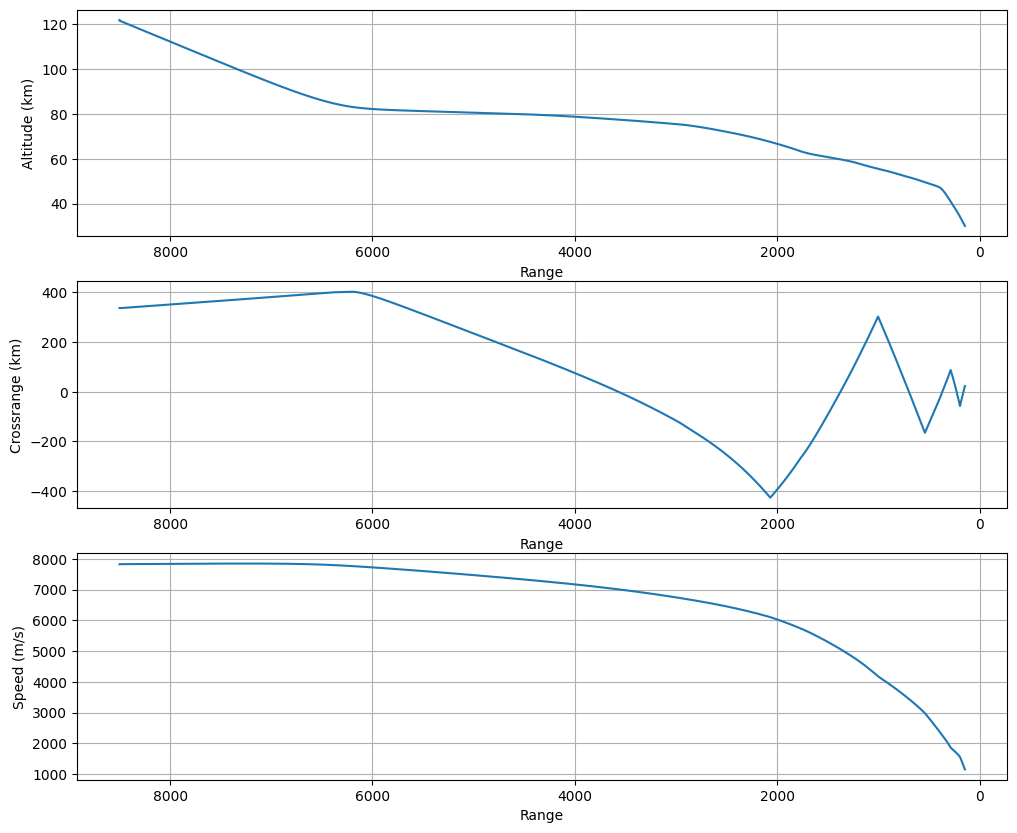

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['range'], data['alt'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_.invert_xaxis()

sin_B = data['az_err'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
sin_c = data['range'].apply(lambda r : math.sin(r / 6371) ).to_numpy()
xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371

print(np.min(xr))

plt_ = ax[1]
plt_.plot(
    data['range'], 
    xr
)
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Crossrange (km)')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]
plt_.plot(data['range'], data['speed'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_.invert_xaxis()




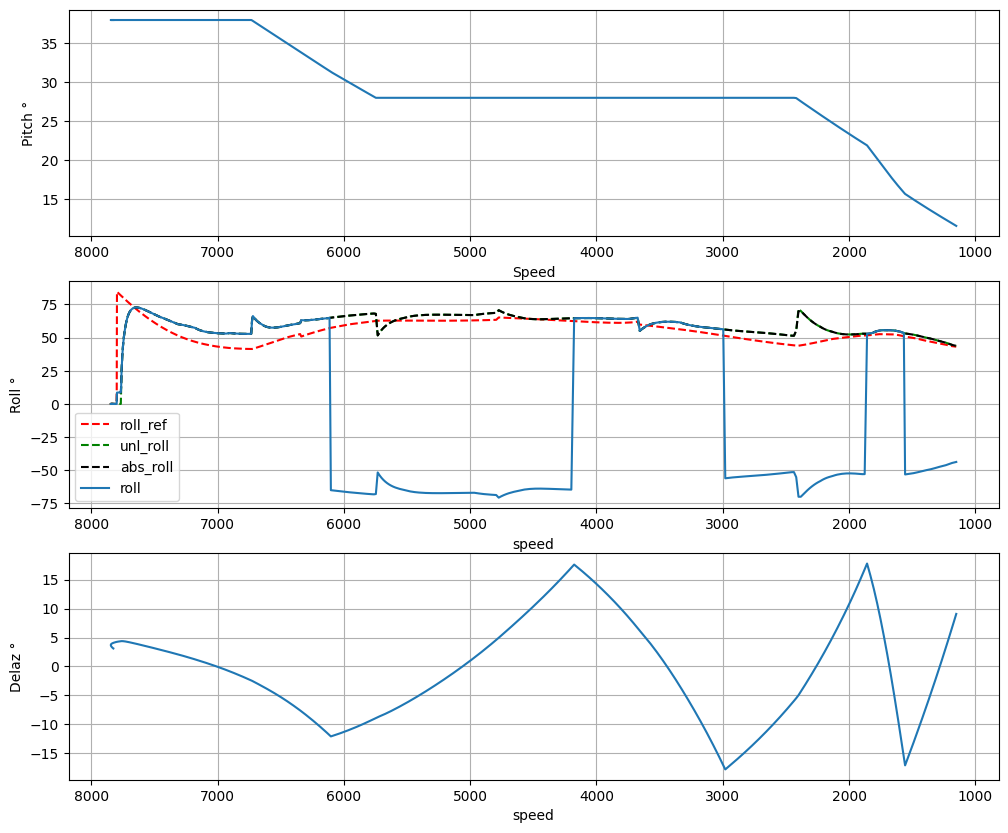

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['speed'], data['pitch'])
    
plt_.set_xlabel('Speed')
plt_.set_ylabel('Pitch °')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[1]

plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref')
plt_.plot(data['speed'], abs(data['unl_roll']),'--', color='g',label='unl_roll')
plt_.plot(data['speed'], abs(data['roll']),'--', color='k',label='abs_roll')
plt_.plot(data['speed'], data['roll'], label='roll')


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Roll °')
plt_.legend()
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]

plt_.plot(data['speed'], data['az_err'])


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Delaz °')
plt_.grid()

plt_.invert_xaxis()

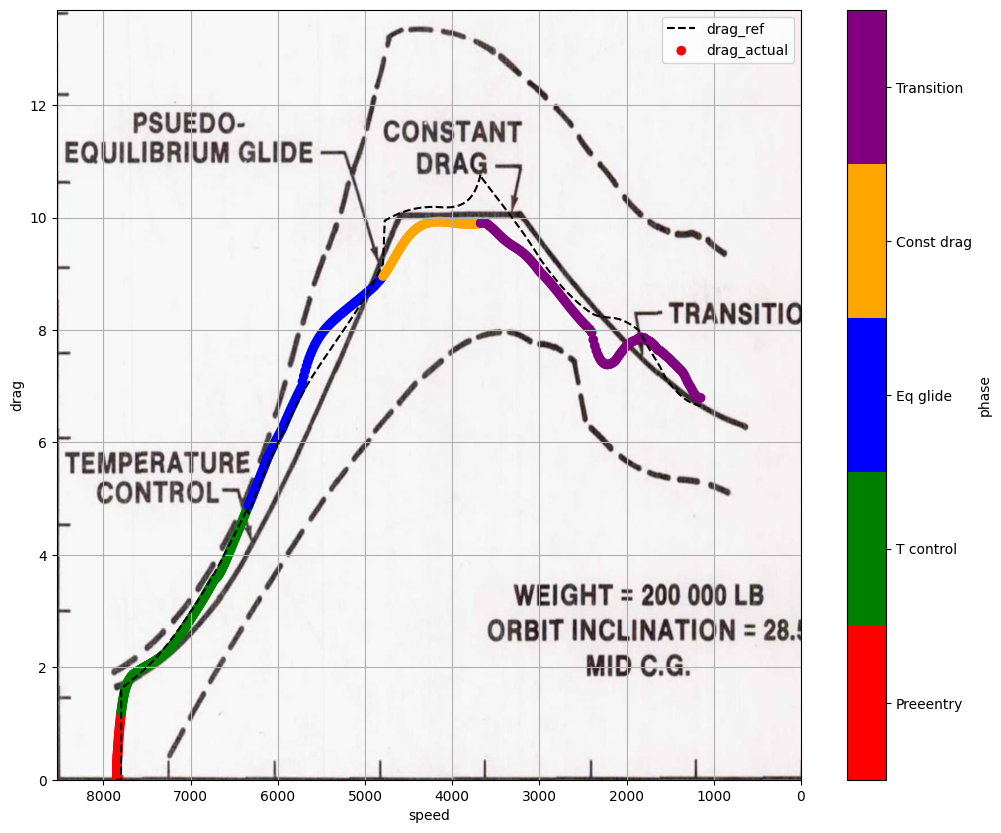

In [7]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax

img = plt.imread("DESCENT GUIDANCE AND MISSION PLANNING FOR SPACE SHUTTLE-8.jpg")
plt_.imshow(img, aspect='auto', extent=[8534, 0, 0, 13.7])

plt_.plot(data['speed'], data['drag_ref'],'--', color='k',label='drag_ref')

colors = data['entry_phase']

color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

# Plotting
plt.scatter(data['speed'], data['drag'], c=colors, cmap=color_map, label='drag_actual')

# Adding colorbar
cbar = plt.colorbar(ticks=[1.4, 2.2, 3.0, 3.8, 4.6])
cbar.ax.set_yticklabels(['Preeentry', 'T control', 'Eq glide', 'Const drag', 'Transition'])
cbar.set_label('phase')



plt_.set_xlabel('speed')
plt_.set_ylabel('drag')
plt_.legend()
plt_.grid()

#plt_.invert_xaxis()

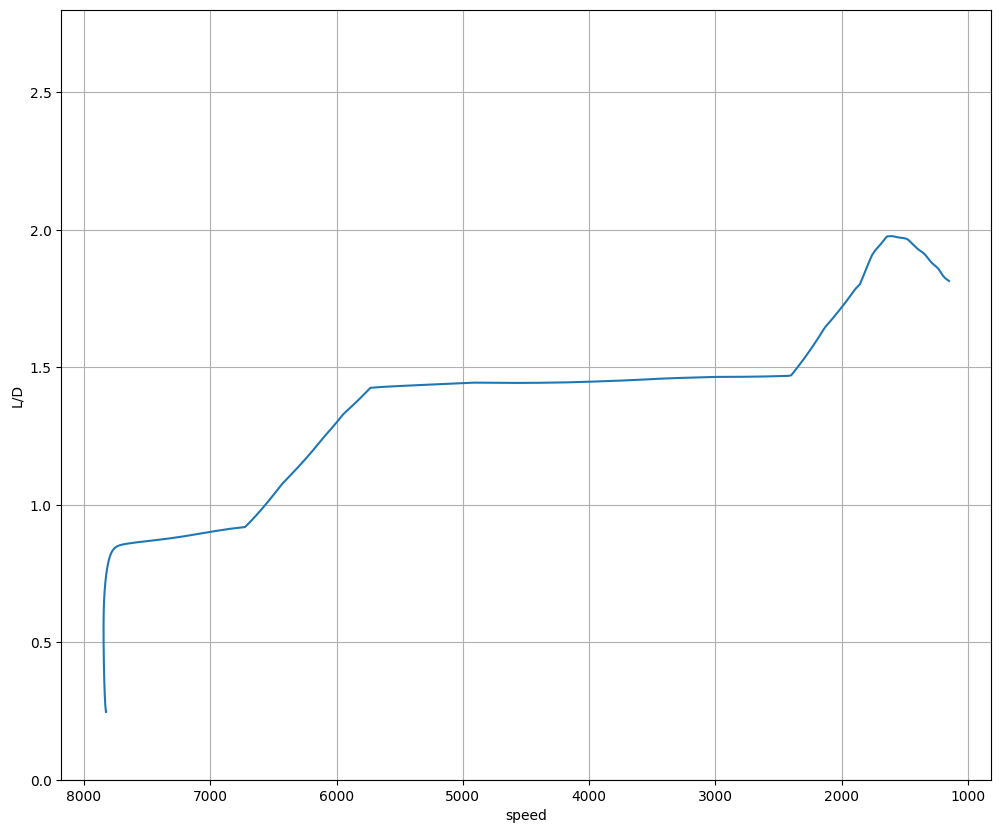

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax
plt_.plot(data['speed'], data['l_d'])
    
plt_.set_xlabel('speed')
plt_.set_ylabel('L/D')
plt_.grid()

plt.ylim([0, 2.8])

plt_.invert_xaxis()


In [85]:
def traj_disp(n, data):
    match n:
        case 1:
            traj_lines = [
                        [
                            np.array([[347.68, 72.178572], [145.45, 198.178572], [78.04, 282.0], [20.26, 332.5]]),
                            np.array([[371.76, 72.178572], [174.34, 190.178572], [39.52, 332.5]]),
                            np.array([[395.83, 72.178572], [183.97, 195.178572], [58.78, 332.5]]),
                            np.array([[463.24, 72.178572], [164.71, 254.178572], [87.67, 332.5]]),
                            np.array([[443.98, 135.178572], [270.64, 205.178572], [126.19, 332.5]])
                        ],
                        [
                            np.array([[453.61, 60.178572], [429.54, 142.178572], [424.72, 156.17857]]),
                            np.array([[386.2, 65.178572], [347.68, 142.178572], [338.05, 177.178572]]),
                            np.array([[328.42, 65.178572], [270.64, 184.178572], [261.01, 226.178572]]),
                            np.array([[222.49, 135.178572], [126.19, 324], [121.37, 342]]),
                            np.array([[155.08, 184.178572], [78.04, 338]]),
                            np.array([[116.56, 228.178572], [58.78, 338]])
                        ]
                    ]
            
            
            r_range = (1380, 9000)
            r_speed = (5350, 8000)
            
            traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed']]
            
            traj_rng = traj_data['range'].to_numpy()
            traj_vel = traj_data['speed'].to_numpy()
            
            traj_x = np.array([traj_x_convert(1, r) for r in traj_rng])
            traj_y = np.array([traj_y_convert(1, v) for v in traj_vel])
            
            trajplot_lines(traj_lines, [traj_x, traj_y])
            
            
        case 2:
            traj_lines = [
                        [
                            np.array([[232.12, 60.0], [150.34, 104.0], [68.41, 328]]),
                            np.array([[333.24, 60.0], [193.6, 328]]),
                            np.array([[376.57, 60.0], [203.23, 328]]),
                            np.array([[443.98, 60.0], [328.42, 282.17], [289.9, 328]])
                        ],
                        [
                            np.array([[304.35, 60.0], [174.34, 336]]),
                            np.array([[342.87, 60.0], [212.86, 336]]),
                            np.array([[381.39, 60.0], [280.27, 336]]),
                            np.array([[232.12, 60.0], [97.3, 336]])
                        ]

                    ]
            
            r_range = (790, 2400)
            r_speed = (4350, 5350)
            
            traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed']]
            
            traj_rng = traj_data['range'].to_numpy()
            traj_vel = traj_data['speed'].to_numpy()
            
            traj_x = np.array([traj_x_convert(2, r) for r in traj_rng])
            traj_y = np.array([traj_y_convert(2, v) for v in traj_vel])
            
            trajplot_lines(traj_lines, [traj_x, traj_y])
        case 3:

            traj_lines = [
                        [
                            np.array([[222.49, 60.178572], [39.52, 332.5]]),
                            np.array([[376.57, 60.178572], [164.71, 332.5]]),
                            np.array([[472.87, 60.178572], [357.31, 230.178572], [270.64, 332.5]])
                        ],
                        [
                            np.array([[270.64, 60.178572], [68.41, 338.178572]]),
                            np.array([[357.31, 60.178572], [145.45, 338.178572]]),
                            np.array([[415.09, 60.178572], [222.49, 338.178572]])
                        ]

                    ]
            
            r_range = (583, 1600)
            r_speed = (3400, 4500)
            
            traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed']]
            
            traj_rng = traj_data['range'].to_numpy()
            traj_vel = traj_data['speed'].to_numpy()
            
            traj_x = np.array([traj_x_convert(3, r) for r in traj_rng])
            traj_y = np.array([traj_y_convert(3, v) for v in traj_vel])
            
            trajplot_lines(traj_lines, [traj_x, traj_y])
        case 4:

            traj_lines = [
                        [
                            np.array([[338.05, 72], [164.71, 236], [39.52, 332.5]]),
                            np.array([[434.35, 72], [347.68, 170], [203.23, 292], [135.82, 332.5]]),
                            np.array([[472.87, 72], [415.09, 165], [261.01, 292], [190, 332.5]])
                        ],
                        [
                            np.array([[405.46, 60], [251.38, 198], [30, 342]]),
                            np.array([[458.5, 60], [347.68, 170], [203.23, 278], [87.67, 342]]),
                            np.array([[324, 254], [150, 342]])
                        ]
                    ]
            
            r_range = (268, 890)
            r_speed = (1950, 3400)
            
            traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed']]
            
            traj_rng = traj_data['range'].to_numpy()
            traj_vel = traj_data['speed'].to_numpy()
            
            traj_x = np.array([traj_x_convert(4, r) for r in traj_rng])
            traj_y = np.array([traj_y_convert(4, v) for v in traj_vel])
            
            trajplot_lines(traj_lines, [traj_x, traj_y])
        case 5:

            traj_lines = [
                        [
                            np.array([[338.05, 72], [183.97, 249], [58.78, 332.5]]),
                            np.array([[424.72, 72], [309.16, 191], [78.04, 332.5]]),
                            np.array([[463.24, 72], [394.40, 156], [212.86, 278], [100.93, 332.5]]),
                            np.array([[469, 72], [405.46, 156], [241.75, 278], [126.19, 332.5]])
                        ],
                        [
                            np.array([[415.09, 60], [265.83, 197], [35, 342]]),
                            np.array([[463.24, 60], [366.94, 163], [193.6, 274], [58.78, 342]])
                        ]
                    ]
            
            r_range = (92, 333)
            r_speed = (762, 1950)
            
            traj_data = data[(data['range'].between(*r_range)) & (data['speed'].between(*r_speed))][['range', 'speed']]
            
            traj_rng = traj_data['range'].to_numpy()
            traj_vel = traj_data['speed'].to_numpy()
            
            traj_x = np.array([traj_x_convert(5, r) for r in traj_rng])
            traj_y = np.array([traj_y_convert(5, v) for v in traj_vel])
            
            trajplot_lines(traj_lines, [traj_x, traj_y])

def trajplot_lines(lines, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

    plt_ = ax
    plt_.invert_yaxis()
    
    solid_lines = lines[0]
    dashed_lines = lines[1]
    
    for l in solid_lines:
        plt_.plot(l[:,0], l[:,1], 'k')
        
    for l in dashed_lines:
        plt_.plot(l[:,0], l[:,1], 'k--')
        
    plt_.plot(data[0], data[1])
        
        
def traj_x_convert(n, val):
    
    par = val * 0.539957
    
    match n:
        case 1:
            if val > 7000:
                return (par**2 * -0.00005111111 + par * 0.38844444 - 228.0444444)
            else:
                return (par**2 * -0.000037792207 + par * 0.32866883 - 183.0636)
        case 2:
            return (par**2 * - 0.00037578 + par * 1.0854212 -302.969942)
        case 3:
            return (par**2 * -0.00143805 + par * 2.4982 - 585.265)
        case 4:
            return (par**2 * -0.003597 + par * 3.49365 - 362.285714)
        case 5:
            return (par**2 * -0.015 + par * 6.425 - 204.75)
            
def traj_y_convert(n, val):
    
    par = val * 3.28084
    
    match n:
        case 1:
            return (-0.03728 * par + 966.857 + 32.7)
        case 2:
            return (-0.089333 * par + 1578.6666 + 32.7)
        case 3:
            return (-0.07785 * par + 1150 + 32.7)
        case 4:
            return (-0.0593 * par + 689 + 32.7)
        case 5:
            return (-0.07828 * par + 535.714 + 32.7)
    
    


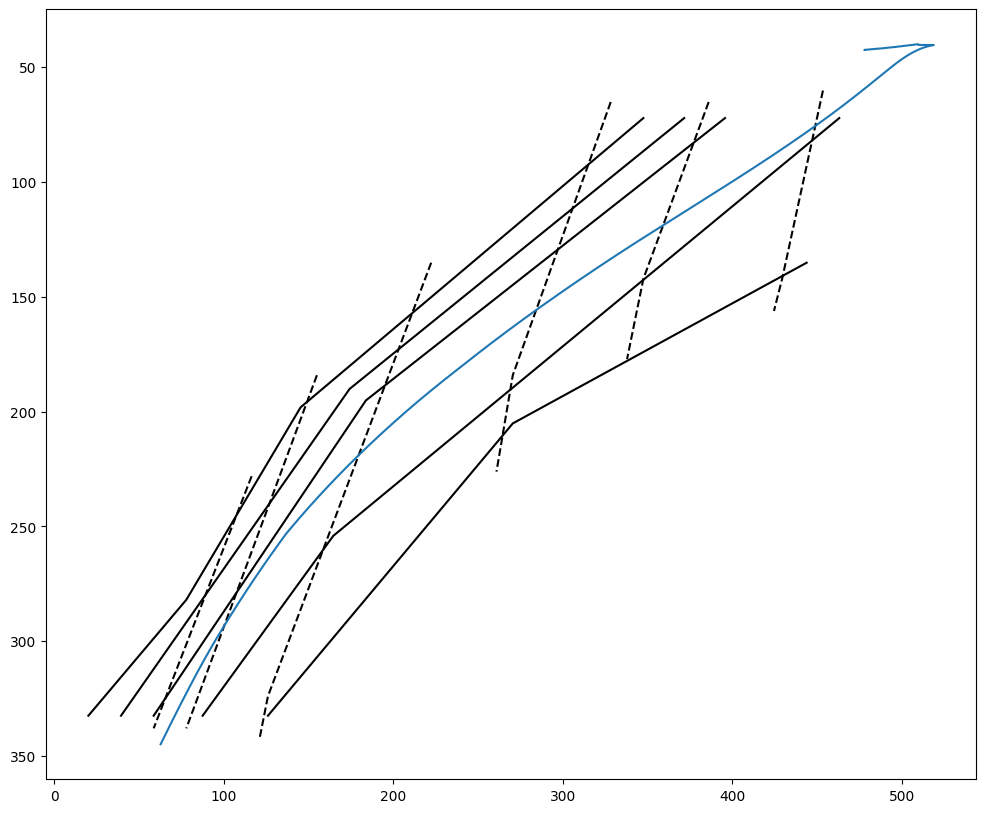

In [86]:
traj_disp(1, data)

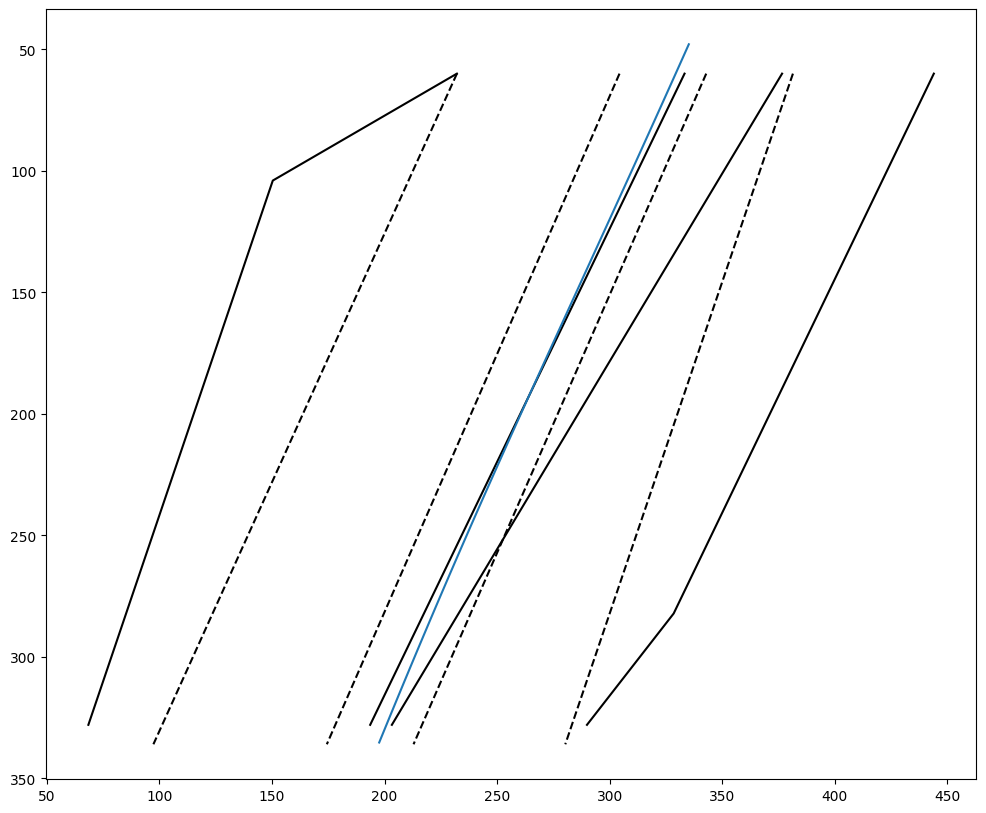

In [87]:
traj_disp(2, data)

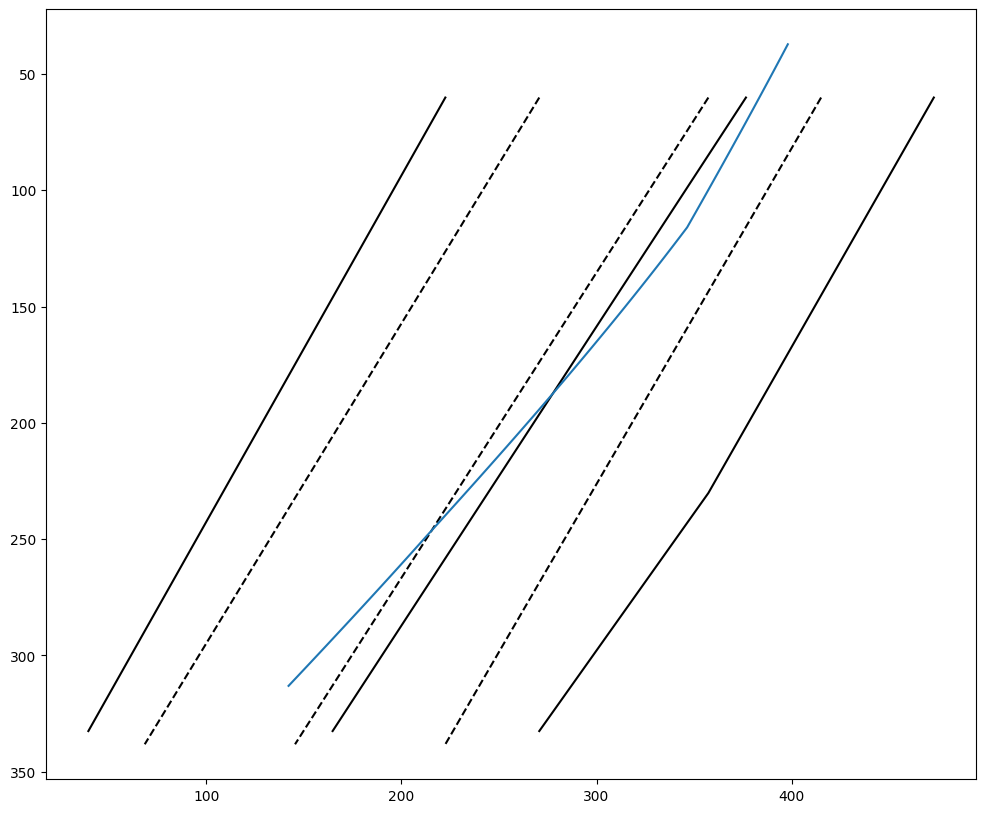

In [80]:
traj_disp(3, data)

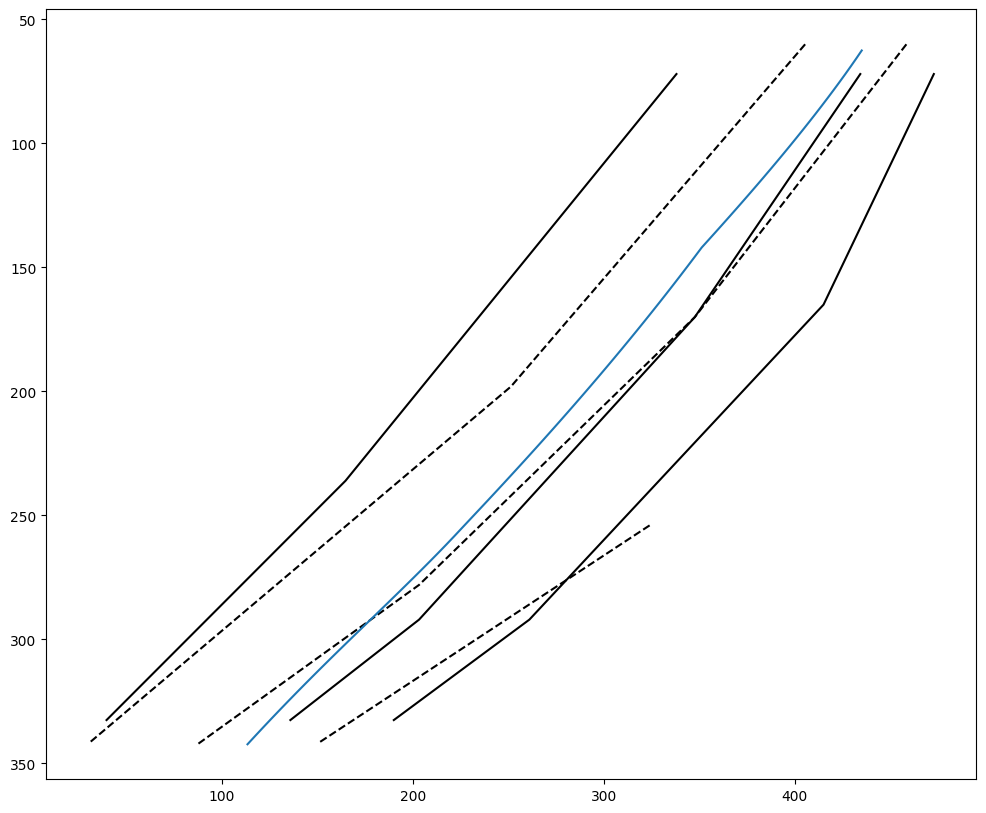

In [81]:
traj_disp(4, data)

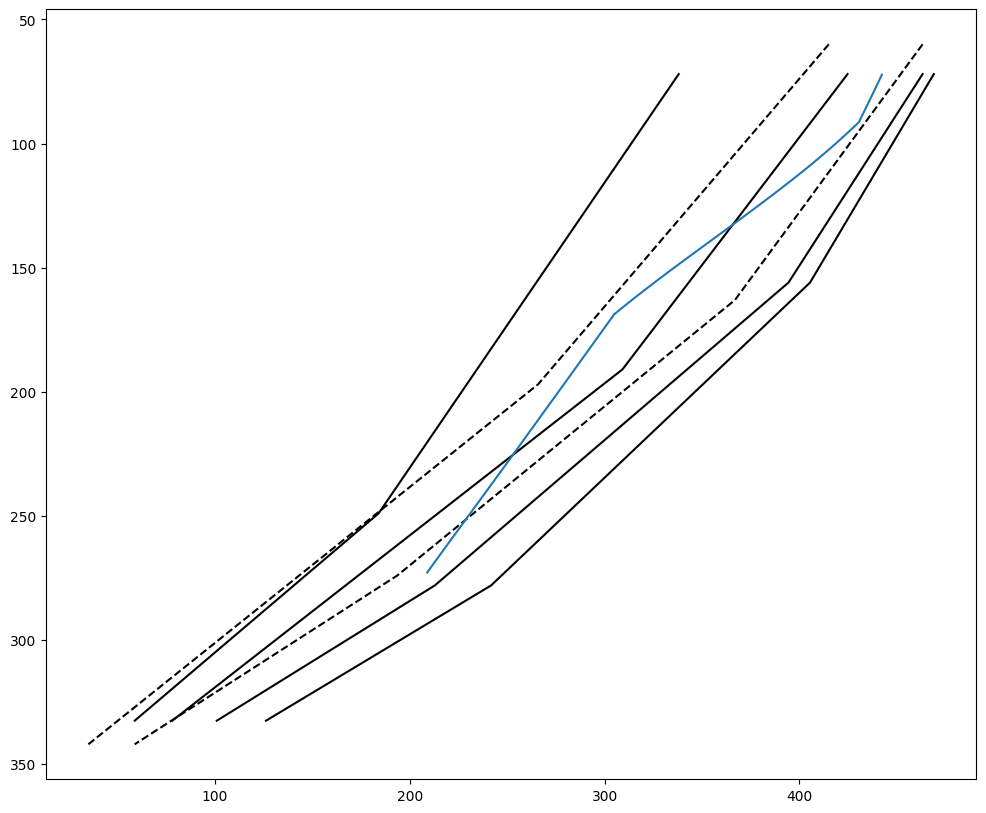

In [82]:
traj_disp(5, data)